array([[0.35865163, 0.48504718],
       [0.09297244, 0.66171359],
       [0.77393678, 0.16534933]])

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [44]:
data = pd.read_csv('/Users/marcus/Documents/Projects/Ironhack/data_1.07_activities/files_for_activities/csv_files/regression_data1.csv')

<AxesSubplot:xlabel='IC2'>

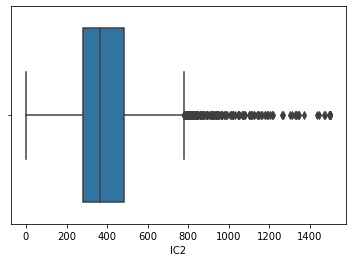

In [12]:
sns.boxplot(x=data['IC2'])

In [13]:
data.describe()['IC2']

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

In [14]:
iqr = np.percentile(data['IC2'],75) - np.percentile(data['IC2'],25)
upper_limit = np.percentile(data['IC2'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC2'],25) - 1.5*iqr

In [15]:
data = data[(data['IC2']>lower_limit) & (data['IC2']<upper_limit)]

<AxesSubplot:xlabel='IC2'>

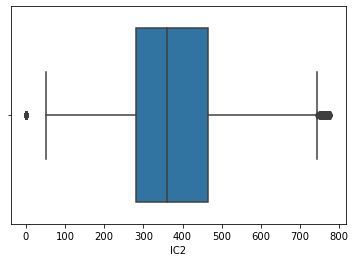

In [16]:
sns.boxplot(x=data['IC2'])

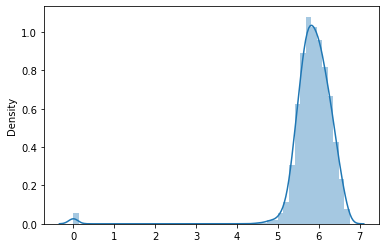

In [17]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
IC3_log = list(map(log_transfom_clean, data['IC3']))
sns.distplot(IC3_log)
plt.show()

In [36]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later   
data['IC3_log'] = list(map(log_transfom_clean_, data['IC3']))

In [37]:
data['IC3_log'] = data['IC3_log'].fillna(np.mean(data['IC3_log']))

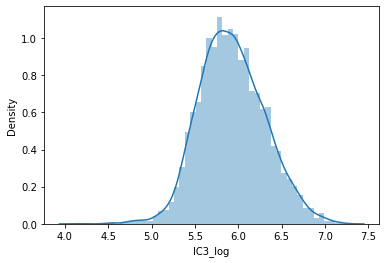

In [38]:
sns.distplot(data['IC3_log'])
plt.show()

In [39]:
iqr_ic3 = np.percentile(data['IC3_log'],75) - np.percentile(data['IC3_log'],25)
upper_limit_ic3 = np.percentile(data['IC3_log'],75) + 1.5*iqr_ic3
lower_limit_ic3 = np.percentile(data['IC3_log'],25) - 1.5*iqr_ic3

In [40]:
data = data[(data['IC3_log']>lower_limit_ic3) & (data['IC3_log']<upper_limit_ic3)]

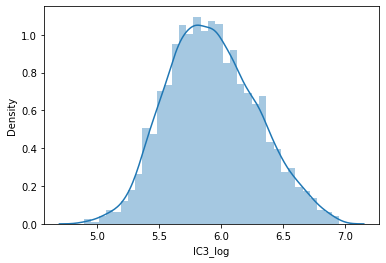

In [41]:
sns.distplot(data['IC3_log'])
plt.show()

In [45]:
data['IC5_'] = np.where(data['IC5']<=0,0,data['IC5'])
mean = np.sum(data['IC5_'])/len(data[data['IC5_']>0])
data['IC5_'] = data['IC5_'].replace(0,mean)
data = data.drop(['IC5'], axis=1)
xt2, lmbda2 = stats.boxcox(data['IC5_'])

NameError: name 'stats' is not defined

In [43]:
data.head()


,HV1,IC1,IC2,IC3,IC4,AVGGIFT,TARGET_D,IC3_log,IC5_
0,2346,420,446,468,503,15.500000,21.0,6.148468,14552.0
1,497,350,364,357,384,3.080000,3.0,5.877736,11696.0
2,1229,469,502,507,544,7.500000,20.0,6.228511,17313.0
3,325,148,181,171,209,6.700000,5.0,5.141664,6334.0
4,768,174,201,220,249,8.785714,10.0,5.393628,7802.0
